<a href="https://colab.research.google.com/github/Kang-Yoonah/BaekJoon/blob/main/Gold/5549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**누적합**

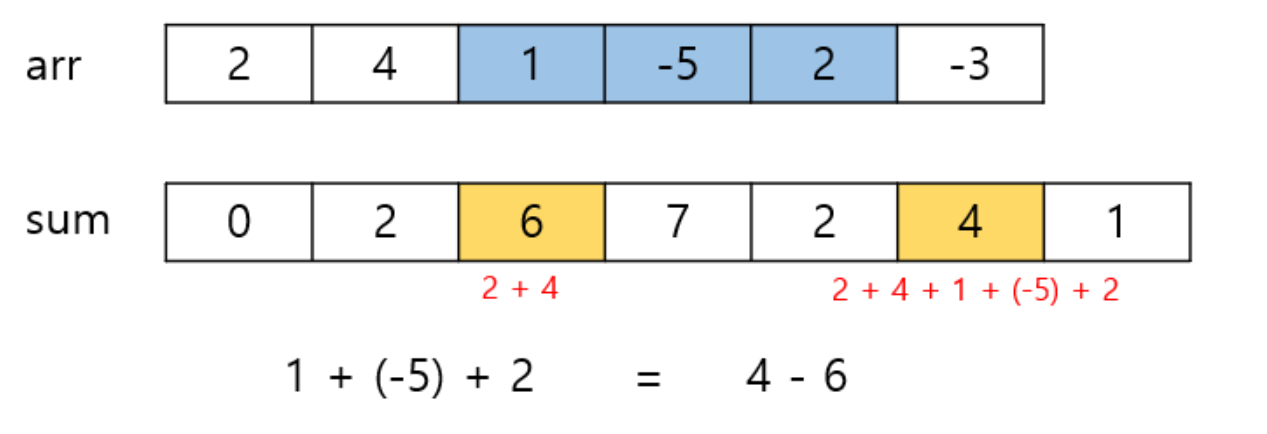

arr의 i항부터 j항까지의 합을 S(i,j)라고 하자.   
이때, `S(i, j) = sum[j+1] - sum[i]` 이다.

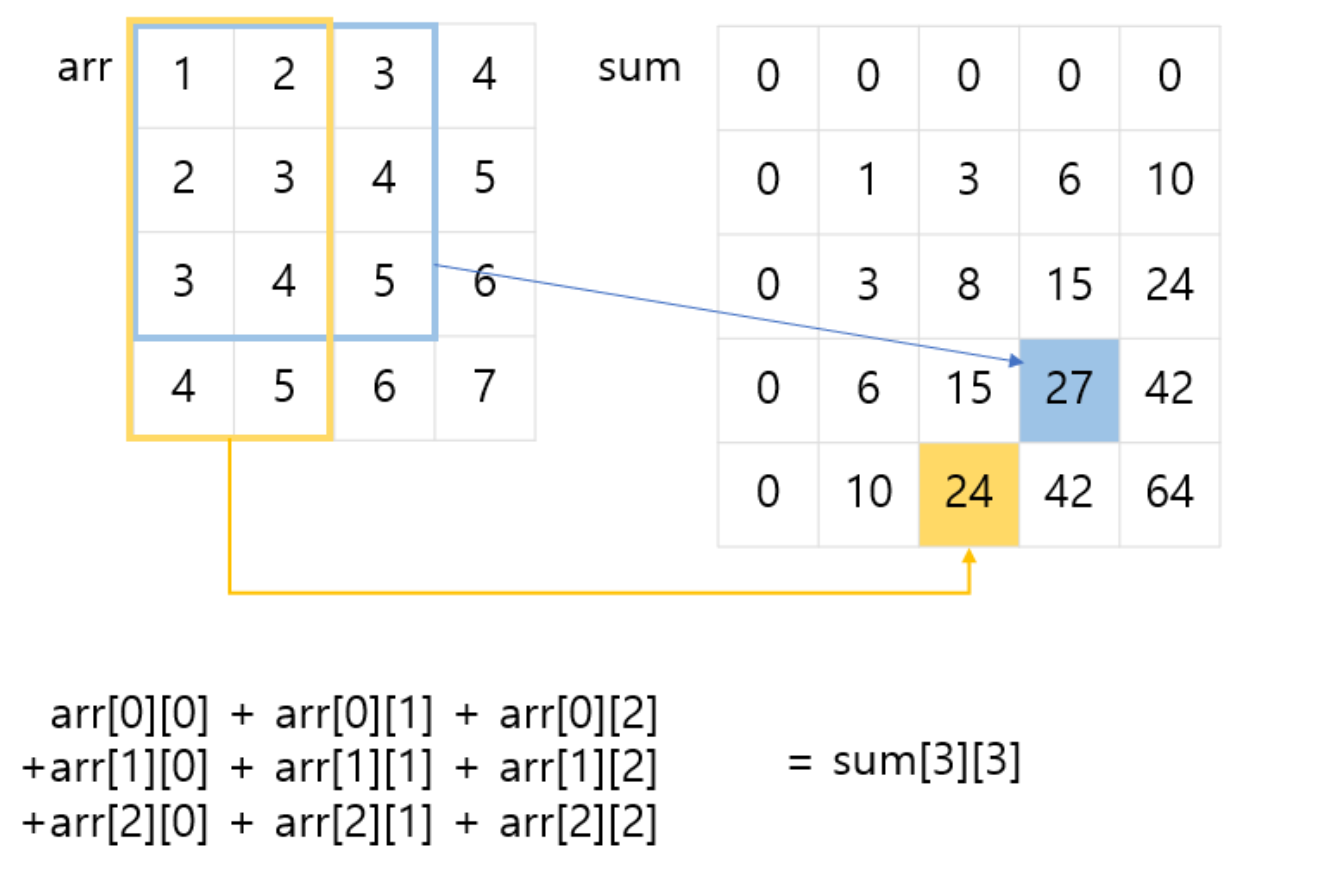

**2차원 배열에 대한 누적합**
- arr을 순차탐색하면서 sum 배열 만들기
- sum[i][j] 에는 arr[0][0]부터 arr[i-1][j-1]까지의 합이 담겨있다고 생각하면 된다.
- `sum_arr[i][j] = arr[i-1][j-1] + sum_arr[i-1][j] + sum_arr[i][j-1] - sum_arr[i-1][j-1]`
    - arr[i-1][j-1] : 그 위치의 값
    - sum_arr[i-1][j], sum_arr[i][j-1] : 그 이전까지의 누적합 
    - sum_arr[i-1][j-1] : 겹치는 누적합 제거하기
- 활용법
    - arr의 (x1, y1)부터 (x2, y2)까지의 합을 S라고 할때,   
    `S = sum[x2+1][y2+1] - sum[1][y2+1] - sum[x2+1][1] + sum[x1][y1]`

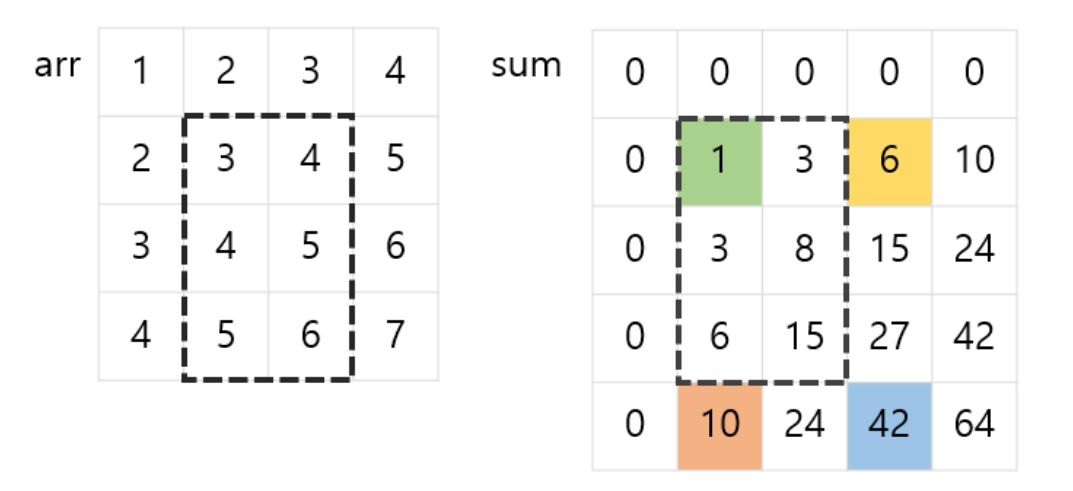

In [ ]:
# 누적합 2차원 리스트 구현
N = int(input())
arr = [list(map(int,input().split())) for _ in range(N)]
sum_arr = [[0]*(N+1) for _ in range(N+1)]

for i in range(1, N+1):
    for j in range(1, N+1):
        sum_arr[i][j] = arr[i-1][j-1] + sum_arr[i-1][j] + sum_arr[i][j-1] - sum_arr[i-1][j-1]

for i in range(N+1):
    print(sum_arr[i])

print()
print('arr의 (x1, y1)부터 (x2, y2)까지의 합을 구할 때 :')
while 1:
    v = list(map(int,input().split()))
    if not v:
        break
    
    v1,v2,v3,v4 = v
    print(sum_arr[v3+1][v4+1] - sum_arr[v3+1][v2] - sum_arr[v1][v4+1] + sum_arr[v1][v2])

5
1 2 3 4 5
2 3 4 5 6
3 4 5 6 7
4 5 6 7 8
5 6 7 8 9
[0, 0, 0, 0, 0, 0]
[0, 1, 3, 6, 10, 15]
[0, 3, 8, 15, 24, 35]
[0, 6, 15, 27, 42, 60]
[0, 10, 24, 42, 64, 90]
[0, 15, 35, 60, 90, 125]

arr의 (x1, y1)부터 (x2, y2)까지의 합을 구할 때 :
1 1 3 2
27



In [2]:
1+2*2+3*2+4

15

[참고] : https://yiyj1030.tistory.com/489

# 5549 : 행성 탐사

In [3]:
def cum(arr, M, N):
    sum_arr = [[[0]*(N+1) for _ in range(M+1)] for _ in range(3)]  # J,O,I
    for i in range(1,M+1):
        for j in range(1,N+1):
            v = arr[i-1][j-1]
            if v == 'J':
                ind = 0
            elif v == 'O':
                ind = 1
            else:
                ind = 2
            for ind_s in range(3):
                if ind_s == ind:
                    sum_arr[ind][i][j] = sum_arr[ind][i-1][j] + sum_arr[ind][i][j-1] - sum_arr[ind][i-1][j-1] + 1
                else:
                    sum_arr[ind_s][i][j] = sum_arr[ind_s][i-1][j] + sum_arr[ind_s][i][j-1] - sum_arr[ind_s][i-1][j-1]
    return sum_arr

def sol():
    M, N = map(int,input().split())
    K = int(input())
    arr = [input().strip() for _ in range(M)]
    sum_arr = cum(arr, M , N)
    
    for _ in range(K):
        a,b,c,d = map(int,input().split())
        for i in range(3):
            print(sum_arr[i][c][d] - sum_arr[i][c][b-1] - sum_arr[i][a-1][d] + sum_arr[i][a-1][b-1], end=' ')
        print()
sol()

4 7
4
JIOJOIJ
IOJOIJO
JOIJOOI
OOJJIJO
3 5 4 7
1 3 2 
2 2 3 6
3 5 2 
2 2 2 2
0 1 0 
1 1 4 7
10 11 7 
